In [1]:
import cymetric as cym
import pandas as pd
import matplotlib.pyplot as plt
import sys
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [52]:
def fracmass_to_frac_atom(mass):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    return mass * uma_238 / uma_235

def get_frac(file, facility):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.inventories(ev, facilities=facility, nucs=['238U'])
    df1_u5 = tm.inventories(ev, facilities=facility, nucs=['235U'])
    df_r = df1_u5
    df_r[df_r.columns[1]] = (df1_u5[df1_u5.columns[1]]/uma_235)/(df1_u8[df1_u8.columns[1]]/uma_238 + df1_u5[df1_u5.columns[1]]/uma_235)
    return df_r

def get_frac_transaction(file, facility):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.transactions(ev, receivers=facility, nucs=['238U'])
    df1_u5 = tm.transactions(ev, receivers=facility, nucs=['235U'])
    df_r = df1_u5
    df_r[df_r.columns[1]] = (df1_u5[df1_u5.columns[1]]/uma_235)/(df1_u8[df1_u8.columns[1]]/uma_238 + df1_u5[df1_u5.columns[1]]/uma_235)
    return df_r

def format_df(df, x_label, y_label):
    df.fillna(0, inplace=True)
    return pd.DataFrame({x_label: df[df.columns[0]], y_label: df[df.columns[1]]})

def make_plot(dfs, x_name, y_name, figsize = (20,12), mk = 'o', mk_z=14, linestyle=' ', mfc='none'):
    e1x = dfs[0].plot(x=x_name, y=y_name, 
                      marker=mk, markersize=mk_z, linestyle=linestyle, 
                      mfc=mfc, figsize=figsize)
    for df in dfs[1:]:
        df.plot(x=x_name, y=y_name, 
                      marker=mk, markersize=mk_z, linestyle=linestyle, 
                      mfc=mfc, figsize=figsize, ax=e1x)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.savefig('trans.png', dpi=326)
    plt.legend()


In [53]:
db_ = cym.dbopen("cyclus.sqlite")
ev_ = cym.Evaluator(db=db_, write=False)
file = "cyclus.sqlite"

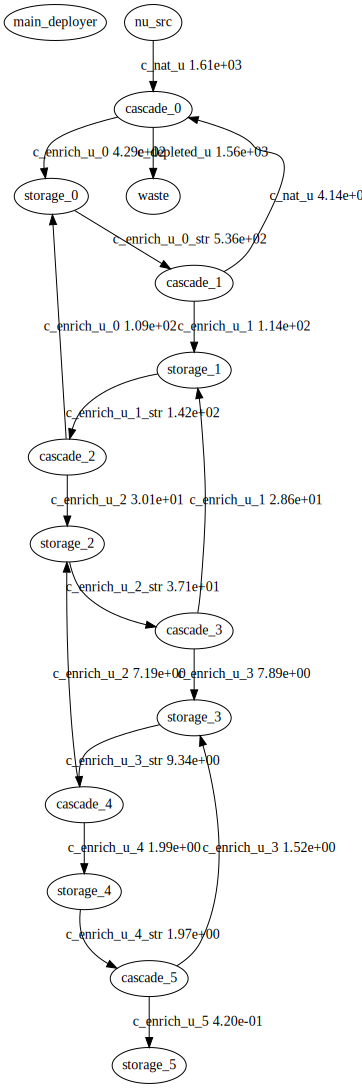

In [54]:
flow_graph = cgr.flow_graph(ev_)
flow_graph

In [55]:
in_str_0 = get_frac_transaction(file, ['storage_0'])
in_str_1 = get_frac_transaction(file, ['storage_1'])
in_str_2 = get_frac_transaction(file, ['storage_2'])
in_str_3 = get_frac_transaction(file, ['storage_3'])
in_str_4 = get_frac_transaction(file, ['storage_4'])
in_str_5 = get_frac_transaction(file, ['storage_5'])

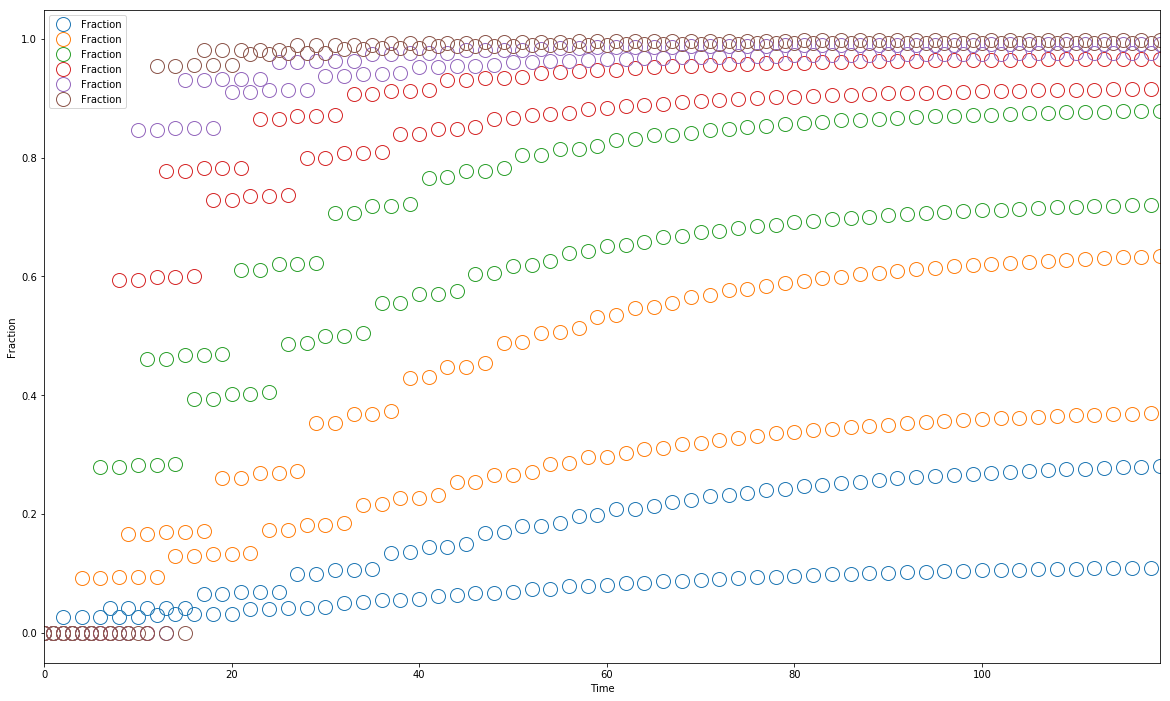

In [56]:
plt_str = []
plt_str.append(format_df(in_str_0, "Time", "Fraction"))
plt_str.append(format_df(in_str_1, "Time", "Fraction"))
plt_str.append(format_df(in_str_2, "Time", "Fraction"))
plt_str.append(format_df(in_str_3, "Time", "Fraction"))
plt_str.append(format_df(in_str_4, "Time", "Fraction"))
plt_str.append(format_df(in_str_5, "Time", "Fraction"))
make_plot(plt_str, "Time", "Fraction" )
